### - В чем принципиальное отличие гибридных рекомендательных систем от коллаборативной филтьтрации?

Гибридные системы, помимо матрицы взаимодействий юзеров и товаров, "подтягивают" дополнительные данные о пользователях и (или) товарах. Поскольку для предсказаний используются дополнительные фичи, гибридная РС "владеет" куда более полной информацией, чем коллаборативная фильтрация. Ценой за это будет усложнение модели. 

### - Приведите 2-3 примера задач, в которых необходимо использовать гибридные системы


Главным плюсом гибридных систем перед коллаборативными, будет более легкий "холодный старт". Поскольку система оперирует бОльшим объемом данных, отсутствие взаимодействия пользователя и товара не является "нулем" - присутствуют дополнительные сведения, позволяющие сделать рекоммендацию на основе "похожести". Если в нашу систему постоянно добавляются товары/ новые пользователи - имеет смысл использовать гибридную систему. Пример - большинство интернет-магазинов.


Другой сильной стороной гибридных систем является способность учитывать специфику.

Как юзера: возраст, гендер, регион, семейное положение и т.д.

Так и товара: тематика/жанры, сезонность, ценовой сегмент.

Например, если у нас "магазин всего", товары в нем разбиты по категориям, и гибридная система с большей вероятностью предлагала бы пользователю, купившему шуруповерт и мастерок, товары из категорий "ремонт" и "инструменты".


### Прочитайте статью про поиск на hh.ru https://habr.com/ru/company/hh/blog/347276/
Нам интересна именно рекомендательная система, раздел "Производительность системы" можно пропустить
Какие основные отличия предложенной системы от тех подходов, которые мы разбирали на семинарах? Какие проблемы могут возникнуть при выводе такой модели в продакшен?

Ключевым отличием системы рекоммендаций hh.ru от подходов, применяемых нами, будет многоступенчатость процесса. Фактически, реализованные там РС представляют каскад из моделей, причем сначала данные подаются на простые, не ресурсоемкие модели, где отсеиваются явно неподходящие вакансии. Тот же объем, что был "рекомендован" простыми моделями подается на более сложные и ресурсоемкие. Фактически, реализация "воронки продаж" в виде каскада моделей.

По сложностям - задавался этим вопросом еще во время 1-го ДЗ: Сайт hh зарабатывает в том числе и помощью платных размещений вакансий. Естественно, деньги работодателем платятся за премиум-возможности, но это прямо противоречит интересам соискателей (непосредственные пользователи системы). Необходимо найти очень тонкий баланс, чтобы соискателю на "аналитика" не выдавались вакансии "менеджера" из-за того, что они премиум, но в то же время чтобы те, кто оплачивает "премиум" оставались в выигрыше.

В статье описано одно из решений этой проблемы: Модели составляют рейтинг для платных вакансий, и примешивают к нему бесплатные, с максимальной вероятностью отклика. Остальные вакансии ранжируются по порядку.

Другая сложность - огромное количество пустых поисковых запросов, особенно от незарегистрированных пользователей. для обработки которых, фактически, была сделана отдельная РС

#### На вебинаре мы рассматривали модель LightFM (https://making.lyst.com/lightfm/docs/lightfm.html). В работе Data Scientist'а важную часть занимает research - исследование существующих архитектур и разбор научных статей, в которых они описываются. Вам предлагается изчуть оригинальную статью про LightFM https://arxiv.org/pdf/1507.08439.pdf и ответить на следующие вопросы:



#### 1) Какой датасет используют авторы?


Авторы используют для тестирования два датасета MovieLens 10M содержит 69878 пользователей, 10681 элемент, 9996948 взаимодействий и 1030 уникальных тегов. - это "плотные" данные о взаимодействии пользователей с фильмами.

Второй датасет - CrossValidated Набор данных состоит из 5953 пользователей,
44 200 вопросов и 188 865 ответов и комментариев. Каждый вопрос сопровождается одним или несколькими из 1032 уникальных тегов. Эти данные более разрежены.

#### 2) Что используют в качестве признаков?

MovieLens - Список жанров и список тэгов фильма, рейтинг точности тега к фильму, оценки пользователей.

CrossValidated - Вопросы и ответы пользователей.

#### 3) С какими моделями сравнивают LightFM? Опишите их основные идеи кратко

collaborative MF: обычная матричная факторизационная модель с сигмоидной функцией.

LSI-LR - контентно-ориентированная модель. Под капотом логистическая регрессия для каждого пользователя. Основывается на факторизации матрицы контента.

LSI-UP: гибридная модель, представляющая профили пользователей (UP) в виде линейных комбинаций векторов содержимого элементов.

У нас есть внешние данные. Что с ними не так? Чего не хватает?

Проведите исследование внешних данных и составьте какие-нибудь содержательные выводы.
Формально Вам нужно построить 3+ графиков (scatter plot, hist или что-то иное) и описать, что мы видим (например, товары такой-то категории болле часто покупаются в следующие дни недели или пользователи с большим достатком предпочитают такие-то товары).
Исследуйте те закономерности, которые Вам интересно, чем менее тривиальный вывод получается, тем лучше!

### LightFM

У этого алогритма есть множество параметров (item/user_alpha, loss, no_components).
Проведите эксперименты аналогично дз 3 (подберите гипперпараметры каким удобно способои и постройте графики)
На выходе необходимо получить pr@5 на валидации (последние 3 недели) > 17%
У Вас, скорее всего, возникнет проблема со временем обучения. Попробуйте запустить алгоритм вообще без фичей или используйте только признаки с небольшим числом уникальных категорий. (item_features['commodity_desc'].unique() - 300 уникальных категорий - это очень много)

In [2]:
import implicit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from lightfm import LightFM
from lightfm.evaluation import precision_at_k as pr

# Для работы с матрицами
from scipy.sparse import csr_matrix, coo_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

# Функции из 1-ого вебинара
import os, sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from implicit.evaluation import precision_at_k

import warnings
warnings.filterwarnings('ignore')

In [3]:
# from src.metrics import precision_at_k, recall_at_k
from src.utils import prefilter_items
from src.recommenders import MainRecommender

In [4]:
data = pd.read_csv('../data/retail_train.csv')
item_features = pd.read_csv('../data/product.csv')
user_features = pd.read_csv('../data/hh_demographic.csv')

# column processing
item_features.columns = [col.lower() for col in item_features.columns]
user_features.columns = [col.lower() for col in user_features.columns]

item_features.rename(columns={'product_id': 'item_id'}, inplace=True)
user_features.rename(columns={'household_key': 'user_id'}, inplace=True)

# train test split
test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(2)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0


In [5]:
data_test['item_id'].unique().shape

(24329,)

In [6]:
data_train['item_id'].unique().shape

(86865,)

In [7]:
np.intersect1d(data_test['item_id'].unique(), data_train['item_id'].unique()).shape
# cross_item.shape

(22143,)

In [8]:
result = pd.read_csv('../data/predictions_basic.csv')
result.head(2)

,user_id,actual,random_recommendation,popular_recommendation,itemitem,cosine,tfidf,own_purchases
0,1,"[821867, 834484, 856942, 865456, 889248, 90795...","[846312, 9823000, 900243, 10309250, 588311]","[6534178, 6533889, 1029743, 6534166, 1082185]","[999999, 1082185, 981760, 1127831, 995242]","[1082185, 999999, 981760, 1127831, 1098066]","[1082185, 981760, 1127831, 999999, 1098066]","[999999, 1082185, 1029743, 995785, 1004906]"
1,3,"[835476, 851057, 872021, 878302, 879948, 90963...","[13511611, 1021529, 928537, 956887, 908361]","[6534178, 6533889, 1029743, 6534166, 1082185]","[999999, 1082185, 981760, 1098066, 995242]","[1082185, 1098066, 981760, 999999, 826249]","[1082185, 981760, 1098066, 826249, 999999]","[999999, 1082185, 1098066, 6534178, 1127831]"


In [9]:
item_features.head(2)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,


In [ ]:
user_features.head(10)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,user_id
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7


Исправим строковые признаки, которые легко выражаются численно.

In [39]:
user_features['age_desc'] = user_features['age_desc'].apply(lambda x: int(x[:2]))

In [ ]:
user_features['income_desc'].unique()

array(['35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', '100-124K',
       '15-24K', '125-149K', '150-174K', '250K+', '175-199K', '200-249K'],
      dtype=object)

In [ ]:
user_features['income_desc'] = user_features['income_desc'].apply(\
                    lambda x: 5 if x=='Under 15K' else (int(x[:2] if x[2]=='-' else x[:3])))

In [ ]:
n_items_before = data_train['item_id'].nunique()

data_train = prefilter_items(data_train, item_features)

n_items_after = data_train['item_id'].nunique()
print('Decreased # items from {} to {}'.format(n_items_before, n_items_after))

Decreased # items from 86865 to 2489


(array([ 46., 142.,   0., 194.,   0., 288.,   0.,  59.,   0.,  72.]),
 array([19. , 23.6, 28.2, 32.8, 37.4, 42. , 46.6, 51.2, 55.8, 60.4, 65. ]),
 <BarContainer object of 10 artists>)

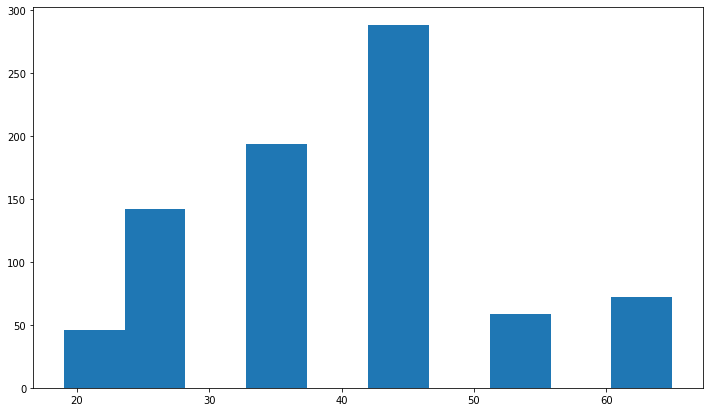

In [46]:
plt.figure(figsize=(12, 7))
plt.hist(user_features['age_desc'].sort_values(), label='распределение по возрастным группам')

(array([212., 364.,  96.,  34.,  38.,  30.,  11.,   5.,   0.,  11.]),
 array([  5. ,  29.5,  54. ,  78.5, 103. , 127.5, 152. , 176.5, 201. ,
        225.5, 250. ]),
 <BarContainer object of 10 artists>)

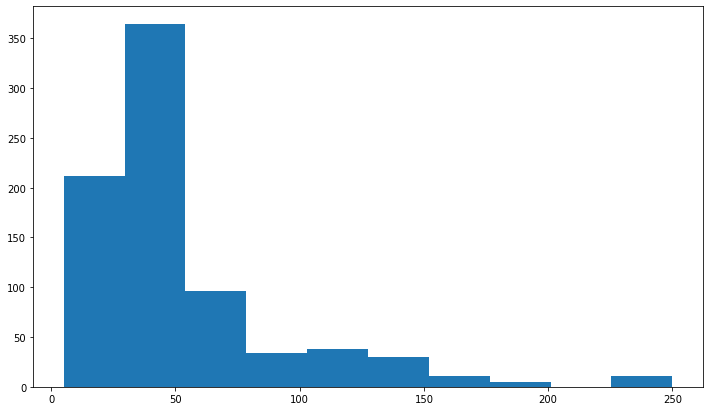

In [48]:
plt.figure(figsize=(12, 7))
plt.hist(user_features['income_desc'].sort_values(), label='распределение по доходам')

In [24]:
# Заведем фиктивный item_id (если юзер покупал товары из топ-5000, то он "купил" такой товар)
#data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999 - уже сделано в src

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат sparse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

# user_item_matrix.head(2)

In [25]:
#data_test = data_test[data_test['item_id'].isin(data_train['item_id'].unique())]
test_user_item_matrix = pd.pivot_table(data_test, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробовать другие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

test_user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат sparse matrix
test_sparse_user_item = csr_matrix(test_user_item_matrix).tocsr()

# test_user_item_matrix.head(2)

In [26]:
# словари перенормировки индексов

userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

userids

array([   1,    2,    3, ..., 2498, 2499, 2500])

In [27]:
user_feat = pd.DataFrame(user_item_matrix.index)
user_feat = user_feat.merge(user_features, on='user_id', how='left')
user_feat.set_index('user_id', inplace=True)

item_feat = pd.DataFrame(user_item_matrix.columns)
item_feat = item_feat.merge(item_features, on='item_id', how='left')
item_feat.set_index('item_id', inplace=True)

user_feat.head(2)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
user_id,,,,,,,
1,65.0,A,35.0,Homeowner,2 Adults No Kids,2,None/Unknown
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
user_feat_lightfm = pd.get_dummies(user_feat, columns=user_feat.columns.tolist())
item_feat_lightfm = pd.get_dummies(item_feat, columns=item_feat.columns.tolist())

In [29]:
model = LightFM(no_components=5,
                loss='bpr', # 'warp'
                learning_rate=0.05, 
                item_alpha=0.1, user_alpha=0.1, 
                random_state=42)

model.fit((sparse_user_item > 0) * 1,  # user-item matrix из 0 и 1
          sample_weight=coo_matrix(user_item_matrix),
          user_features=csr_matrix(user_feat_lightfm.values).tocsr(),
          item_features=csr_matrix(item_feat_lightfm.values).tocsr(),
          epochs=15, 
          num_threads=4) 

In [30]:
user_emb = model.get_user_representations(
    features=csr_matrix(user_feat_lightfm.values).tocsr())

In [31]:
item_emb = model.get_item_representations(
    features=csr_matrix(item_feat_lightfm.values).tocsr())

In [32]:
user_emb[1]  # embeddings

array([[ 0.00270363,  0.00367539, -0.00714134, -0.00359067,  0.00926896],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [ 0.0007317 ,  0.00155531, -0.00272138, -0.00251191,  0.00305148],
       [ 0.00057762,  0.00270453, -0.00187278, -0.00184374,  0.00192285],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [33]:
model.predict


<bound method LightFM.predict of <lightfm.lightfm.LightFM object at 0x7fbbafa4d2d0>>

In [34]:
# pr = precision_at_k
train_precision = pr(model, sparse_user_item, 
                                 user_features=csr_matrix(user_feat_lightfm.values).tocsr(),
                                 item_features=csr_matrix(item_feat_lightfm.values).tocsr(),
                                 k=5).mean()

train_precision

0.22737095

Подбор параметров.

In [35]:
learning_rate = [0.05, 0.1, 0.2]
item_alpha = [0.1, 0.5, 1, 2]
user_alpha = [0.05, 0.1, 0.2]
no_components = [3, 5, 7, 10]

best_pr = 0
report_list = []

In [36]:
for no_comp in no_components:
    for l_rate in learning_rate:
        for i_alpha in item_alpha:
            for u_alpha in user_alpha:
                model = LightFM(no_components=no_comp,
                    loss='warp', #'bpr'
                    learning_rate=l_rate, 
                    item_alpha=i_alpha, user_alpha=u_alpha, 
                    random_state=42)

                model.fit((sparse_user_item > 0) * 1,  # user-item matrix из 0 и 1
                          sample_weight=coo_matrix(user_item_matrix),
                          user_features=csr_matrix(user_feat_lightfm.values).tocsr(),
                          item_features=csr_matrix(item_feat_lightfm.values).tocsr(),
                          epochs=15, 
                          num_threads=4) 

                train_precision = pr(model, sparse_user_item, 
                                                 user_features=csr_matrix(user_feat_lightfm.values).tocsr(),
                                                 item_features=csr_matrix(item_feat_lightfm.values).tocsr(),
                                                 k=5).mean()
    
                test_precision = pr(model, test_sparse_user_item, 
                                                 user_features=csr_matrix(user_feat_lightfm.values).tocsr(),
                                                 item_features=csr_matrix(item_feat_lightfm.values).tocsr(),
                                                 k=5).mean()

                report = f'test_precision = {test_precision} train_precision = {train_precision} \n no_components={no_comp} learning_rate={l_rate}, item_alpha={i_alpha}, user_alpha={u_alpha} '
                report_list.append(report)
                if test_precision > best_pr:
                    best_report = report
                    best_pr = test_precision

#                 print(report)

print('*'*10)
print('best params')
print(best_report)

**********
best params
test_precision = 0.3464586138725281 train_precision = 0.3464586138725281 
 no_components=10 learning_rate=0.05, item_alpha=1, user_alpha=0.1 


In [37]:
count = 9
for i in sorted(report_list, reverse = True):
    print(i)
    count -= 1
    if count == 0:
        break

test_precision = 0.3464586138725281 train_precision = 0.3464586138725281 
 no_components=10 learning_rate=0.05, item_alpha=1, user_alpha=0.1 
test_precision = 0.3462185263633728 train_precision = 0.3462185263633728 
 no_components=10 learning_rate=0.1, item_alpha=0.1, user_alpha=0.05 
test_precision = 0.34613850712776184 train_precision = 0.34613850712776184 
 no_components=7 learning_rate=0.1, item_alpha=0.1, user_alpha=0.2 
test_precision = 0.34613850712776184 train_precision = 0.34613850712776184 
 no_components=7 learning_rate=0.1, item_alpha=0.1, user_alpha=0.1 
test_precision = 0.34613850712776184 train_precision = 0.34613850712776184 
 no_components=7 learning_rate=0.1, item_alpha=0.1, user_alpha=0.05 
test_precision = 0.34613850712776184 train_precision = 0.34613850712776184 
 no_components=5 learning_rate=0.2, item_alpha=0.1, user_alpha=0.1 
test_precision = 0.34613850712776184 train_precision = 0.34613850712776184 
 no_components=5 learning_rate=0.2, item_alpha=0.1, user_alph